<a href="https://colab.research.google.com/github/YokoSSS/ProgrammingPython/blob/OUJ_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80%EF%BC%B0%EF%BD%99%EF%BD%94%EF%BD%88%EF%BD%8F%EF%BD%8E%EF%BC%88'24%EF%BC%89/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80%EF%BC%B0%EF%BD%99%EF%BD%94%EF%BD%88%EF%BD%8F%EF%BD%8E%EF%BC%88'24%EF%BC%89_81_%E6%94%BE%E7%89%A9%E9%81%8B%E5%8B%95%E3%81%AE%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E5%85%A5%E9%96%80Python24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第8章 シミュレーション・WebAPIの利用

 * 左上の「ファイル」を開いて、「ドライブにコピーを保存」をしてください。
 * 自分のGoogleドライブに、そのファイルが保存されます。ファイル名は「のコピー」が、最後（右端）についています。それを利用して学習・演習を進めて下さい。

* 物理シミュレーション
* 比例代表選挙のドント法の計算
* WebAPIを利用した、データ分析の初歩的な手法

# 8.1 放物運動のシミュレーション

*   物体を投げ上げたときの落下の軌跡を予想する
*   空気抵抗を考慮しなければ、横方向の等速運動と縦方向の等加速度運動で動きを予想できる

ここでは、数式を、以下の通りとする。（解析的に解くことができるが、線形近似について学ぶために、あえて、$y$ 方向は線形近似で求める。）

* $x$ 方向、時刻$t$の位置を $x(t)$、速度を $ v_{x}(t) $ とする。
    * $ v_{x}(t + \Delta t) = v_x(t) $
        * よって、 $v_x(t) = v_x(0) $ （変化なし）
            * よって、 $ x(t) = x(0) + v_{x}(0) \times t $
* $y$ 方向、時刻$t$の位置を $y(t)$、速度を $ v_{y}(t) $ とする。
    * $ v_{y} (t + \Delta t) = v_{y} (t) - g \Delta t$
        * よって、 $v_y(t) = v_y(0) -gt $
            * ここで $ y(t + \Delta t) = y(t) + \frac{v_{y}(t+\Delta t)+ v_{y}(t)}{2} \times \Delta t $ を採用してみる。

以上の数式を、リスト x, y, vx, vy を利用して、繰り返しで計算を進めていく。

以下には、プログラムを2種類用意している。
* 一番目のプログラムは、append を使わず、x, y には 添字でアクセスするので動作が速い。
* 二番目のプログラムは、append を使って計算に時間がかかるが、プログラムそのものの意味はわかりやすい。

(1) x, y のリストに append を使わないプログラム

In [ ]:
# x, y のリストに append を使わないプログラム
# matplotlib で描画
import math as math # 数値計算ライブラリ
import matplotlib.pyplot as plt # グラフ描画ライブラリ

span = 20 # 継続秒数
dt = 0.01 # 微小時間 (時間間隔)
v0 = 30.0 # 初速度
g = 9.8 # 重力加速度
times = int(0.5 + span / dt) # 繰り返し回数 2進法←→10進法 変換のせいで整数でなくなるときがあるので int で整数化する
x = [0.0] * (1 + times) # 水平位置の初期値 (0.0) で、長さ 1 + times のリストを作る
y = [0.0] * (1 + times) # 垂直位置の初期値 (0.0) で、長さ 1 + times のリストを作る
h = 0.7 # 反発係数
angle = 45.0 * math.pi / 180.0 # 投げ上げ角度
x_size, y_size, zoom = 16, 2, 20 # 描画領域の縦横の大きさとズーム率

vx = v0 * math.cos(angle) # 水平方向の初速度
vy = v0 * math.sin(angle) # 鉛直方向の初速度

for t in range(times): # step t から step t+1 への位置を計算する
    x[t + 1] = x[t] + vx * dt # 水平方向の新しい位置を リスト x に追加

    new_vy = vy - g * dt # 微小時間後の鉛直方向の速度を仮計算する
    new_y = y[t] + (vy + new_vy) / 2.0 * dt # 微小時間後の鉛直位置を仮計算する

    vy = new_vy # 地面にぶつかってないとして、微小時間後の鉛直方向の速度を設定する
    if new_y < 0: # もし微小時間後の鉛直位置の仮計算値が 0 より小さいなら地面に当たっていることになるので
        vy = -new_vy * h # 反発係数 h で反発させる
        new_y = -new_y # 反発したあとの位置
    y[t + 1] = new_y # 微小時間後の鉛直位置をリスト y に追加

plt.figure(figsize=[x_size, y_size])
plt.plot(x, y) # 位置の配列をプロット
plt.title("parabollic motion") # グラフのタイトル
plt.xlabel("distance") #x 軸ラベル
plt.ylabel("height") #y 軸ラベル
plt.xlim(0, zoom * x_size) # 描画領域 x 方向
plt.ylim(0, zoom * y_size) # 描画領域 y 方向

(2) x, y のリストに append を使うプログラム

(0.0, 40.0)

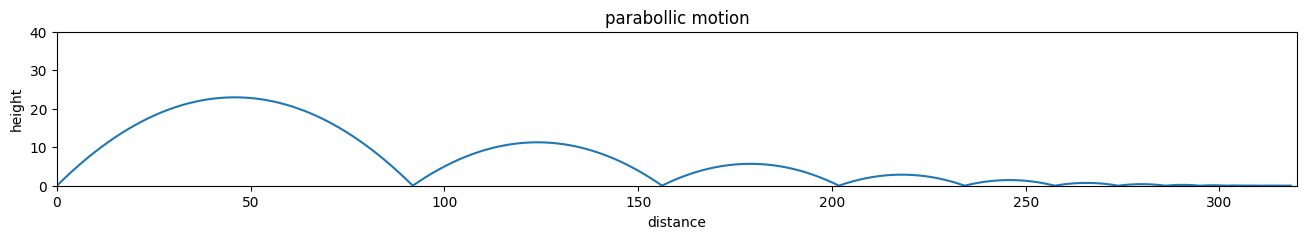

In [ ]:
# x, y のリストに append を使うプログラム
# matplotlib で描画
import math as math # 数値計算ライブラリ
import matplotlib.pyplot as plt # グラフ描画ライブラリ

span = 15 # 継続秒数
dt = 0.01 # 微小時間 (時間間隔)
v0 = 30.0 # 初速度
g = 9.8 # 重力加速度
lap = 0.0 # 計算中の経過時間
x = [0.0] # 水平位置の初期値 0
y = [0.0] # 垂直位置の初期値 0
h = 0.7 # 反発係数
angle = 45.0 * math.pi / 180.0 # 投げ上げ角度
x_size, y_size, zoom = 16, 2, 20 # 描画領域の縦横の大きさとズーム率

vx = v0 * math.cos(angle) # 水平方向の初速度
vy = v0 * math.sin(angle) # 鉛直方向の初速度
now_x, now_y = x[0], y[0] # 初期値

while lap <= span: # 経過時間が、継続時間より短い間、以下を繰り返す
    new_x = now_x + vx * dt # 微小時間後の水平位置
    x.append(new_x) # 水平方向の新しい位置を リスト x に追加

    new_vy = vy - g * dt # 微小時間後の鉛直方向の速度を仮計算する
    new_y = now_y + (vy + new_vy) / 2.0 * dt # 微小時間後の鉛直位置を仮計算する
    if new_y < 0: # もし微小時間後の鉛直位置の仮計算値が 0 より小さいなら地面に当たっていることになるので
        new_vy = -h * new_vy # 反発係数 h で反発させる
        new_y = -new_y # 反発したあとの位置
    y.append(new_y) # 微小時間後の鉛直位置をリスト y に追加

    now_x, now_y, vy = new_x, new_y, new_vy # 次の繰り返しのために、現在位置を更新
    lap += dt # 経過時間を増やす

plt.figure(figsize=[x_size, y_size])
plt.plot(x, y) # 位置の配列をプロット
plt.title("parabollic motion") # グラフのタイトル
plt.xlabel("distance") #x 軸ラベル
plt.ylabel("height") #y 軸ラベル
plt.xlim(0, zoom * x_size) # 描画領域 x 方向
plt.ylim(0, zoom * y_size) # 描画領域 y 方向

### 確認問題　（確認問題の正答はありません。授業中に提示します）

上のプログラムの span, dt, v0, x, y, h, angle, x_size, y_size, zoom などを変更して、描かれるグラフの違いについて考察せよ。（一気に全部変えるのではなく、一つだけ極端に変えてみると面白い。）

# 次の教材
8.2 ドント法
* https://colab.research.google.com/drive/1D6cT1tpn-qZ_Awn3PCUnHTp87hQeGahC

(0.0, 40.0)

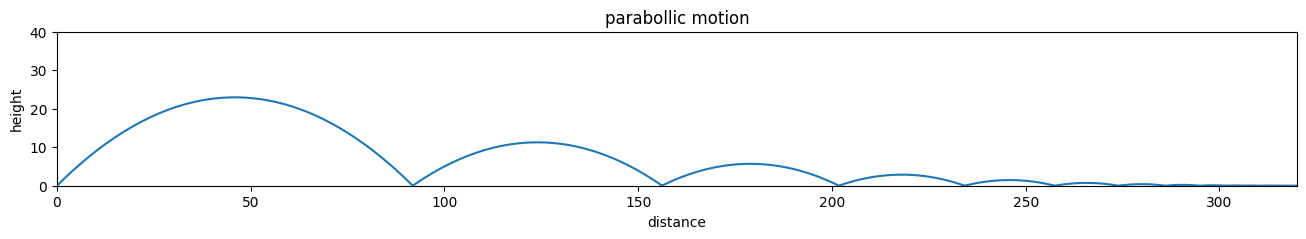

In [ ]:
import math as math # 数値計算ライブラリ

import matplotlib.pyplot as plt # グラフ描画ライブラリ



span = 20 # 継続秒数

dt = 0.01 # 微小時間 (時間間隔)

v0 = 30.0 # 初速度

g = 9.8 # 重力加速度

times = int(0.5 + span / dt)

x = [0.0] * (1 + times)

y = [0.0] * (1 + times)



angle = 45.0 * math.pi / 180.0 # 投げ上げ角度

x_size, y_size, zoom = 16, 2, 20 # 描画領域の縦横の大きさとズーム率

vx = v0 * math.cos(angle) # 水平方向の初速度

vy = v0 * math.sin(angle) # 鉛直方向の初速度

for t in range(times): # step t から step t+1 への位置を計算する

    x[t + 1] = x[t] + vx * dt



    new_vy = vy - g * dt # 微小時間後の鉛直方向の速度を仮計算する

    new_y = y[t] + (vy + new_vy) / 2.0 * dt # 微小時間後の鉛直位置を仮計算する



    vy = new_vy # 地面にぶつかってないとして、微小時間後の鉛直方向の速度を設定する

    if new_y < 0: # もし微小時間後の鉛直位置の仮計算値が 0 より小さいなら地面に当たっていることになるので

        vy = -new_vy * h # 反発係数 h で反発させる

        new_y = -new_y # 反発したあとの位置

    y[t + 1] = new_y


plt.figure(figsize=[x_size, y_size])

plt.plot(x, y) # 位置の配列をプロット

plt.title("parabollic motion") # グラフのタイトル

plt.xlabel("distance") #x 軸ラベル

plt.ylabel("height") #y 軸ラベル

plt.xlim(0, zoom * x_size) # 描画領域 x 方向

plt.ylim(0, zoom * y_size) # 描画領域 y 方向


(0.0, 40.0)

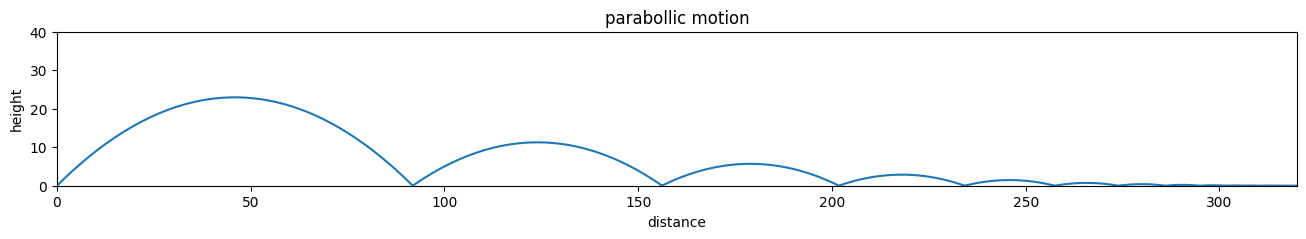

In [ ]:
import math as math # 数値計算ライブラリ

import matplotlib.pyplot as plt # グラフ描画ライブラリ



span = 20 # 継続秒数

dt = 0.01 # 微小時間 (時間間隔)

v0 = 30.0 # 初速度

g = 9.8 # 重力加速度

times = int(0.5 + span / dt)

x = [0.0] * (1 + times)

y = [0.0] * (1 + times)

h = 0.7 # 反発係数

angle = 45.0 * math.pi / 180.0 # 投げ上げ角度

x_size, y_size, zoom = 16, 2, 20 # 描画領域の縦横の大きさとズーム率

vx = v0 * math.cos(angle) # 水平方向の初速度

vy = v0 * math.sin(angle) # 鉛直方向の初速度

for t in range(times): # step t から step t+1 への位置を計算する

    x[t + 1] = x[t] + vx * dt



    new_vy = vy - g * dt # 微小時間後の鉛直方向の速度を仮計算する

    new_y = y[t] + (vy + new_vy) / 2.0 * dt # 微小時間後の鉛直位置を仮計算する



    vy = new_vy # 地面にぶつかってないとして、微小時間後の鉛直方向の速度を設定する

    if new_y < 0: # もし微小時間後の鉛直位置の仮計算値が 0 より小さいなら地面に当たっていることになるので

        vy = -new_vy * h # 反発係数 h で反発させる

        new_y = -new_y # 反発したあとの位置

    y[t + 1] = new_y


plt.figure(figsize=[x_size, y_size])

plt.plot(x, y) # 位置の配列をプロット

plt.title("parabollic motion") # グラフのタイトル

plt.xlabel("distance") #x 軸ラベル

plt.ylabel("height") #y 軸ラベル

plt.xlim(0, zoom * x_size) # 描画領域 x 方向

plt.ylim(0, zoom * y_size) # 描画領域 y 方向

In [ ]:
# 得票状況と議席数の設定

tokuhyo = [["A", 1200], ["B", 660], ["C", 1440], ["D", 180]]
giseki = 6


# 初期化

tousu = len(tokuhyo) # 党数

hikaku = [0] * tousu # 比較検討リスト

tousenkei = 0 # すでに当選が決まった人数



# 各党に、当選数を末尾に初期化（全党 0 にする）して追加

for kakutou in tokuhyo:

    kakutou.append(0)


# 比較検討リストに、得票数を複写

for m in range(tousu):
    hikaku[m] = tokuhyo[m][1]



# 当選数が議席数を下回っている間、続ける

while tousenkei < giseki:
    print(tokuhyo, hikaku)

    # 比較検討リストの最大を探すために max を 0

    max = 0

    # 比較検討リストの最大 hikaku[maxi] の maxi を探して当選にする

    for i in range(tousu):
        if max < hikaku[i]:
            max = hikaku[i]
            maxi = i
        # 当選が決まったら割り当てる
        tokuhyo[maxi][2] = tokuhyo[maxi][2] + 1
        # 合計を増やす
        tousenkei = tousenkei + 1
        # 比較検討リストを更新する
        hikaku[maxi] = tokuhyo[maxi][1] / (tokuhyo[maxi][2] + 1)

# 結果の表示
print(tokuhyo, hikaku)


[['A', 1200, 0], ['B', 660, 0], ['C', 1440, 0], ['D', 180, 0]] [1200, 660, 1440, 180]
[['A', 1200, 2], ['B', 660, 0], ['C', 1440, 2], ['D', 180, 0]] [400.0, 660, 480.0, 180]
[['A', 1200, 3], ['B', 660, 3], ['C', 1440, 2], ['D', 180, 0]] [300.0, 165.0, 480.0, 180]
